In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data= pd.isnull(df).sum()
data

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0, 0.5, 'Delivery Time')

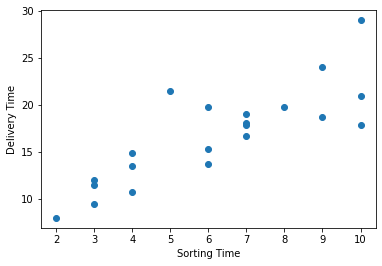

In [6]:
plt.scatter(df["Sorting Time"],df["Delivery Time"])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

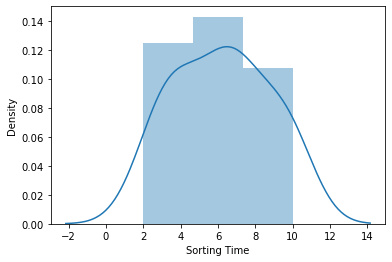

In [7]:
sns.distplot(df["Sorting Time"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

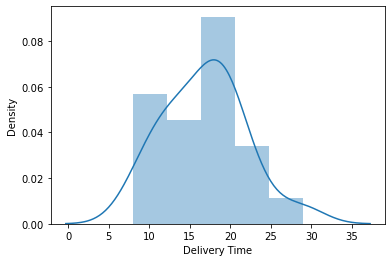

In [8]:
sns.distplot(df["Delivery Time"])

In [9]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

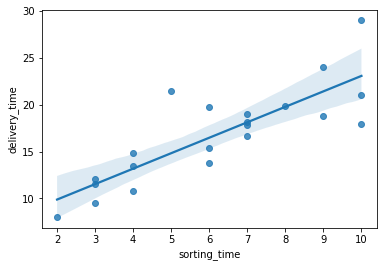

In [10]:
sns.regplot(x="sorting_time",y="delivery_time",data=df)

In [11]:
model= smf.ols("delivery_time ~ sorting_time",data=df).fit()

In [12]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [14]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [15]:
model.rsquared

0.6822714748417231

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        10:42:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
newdata = pd.Series([3,11])

In [18]:
data_pred= pd.DataFrame(newdata,columns= ["sorting_time"])
data_pred

,sorting_time
0,3
1,11


In [19]:
model.predict(data_pred)

0    11.529794
1    24.721953
dtype: float64